In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
for_hire_path = "data/trip_record_data_filtered/for_hire/*.parquet"
green_taxi_path = "data/trip_record_data_filtered/green_taxi/*.parquet"
yellow_taxi_path = "data/trip_record_data_filtered/yellow_taxi/*.parquet"
high_volume_path = "data/trip_record_data_filtered/high_volume/*.parquet"

In [3]:
def yello_taxi_sql(period):
    return f"""
    select DATE_TRUNC('{period}', tpep_pickup_datetime) AS ride_date, count(*) rides from 
           '{yellow_taxi_path}'
        group by ride_date
        order by ride_date
"""


def green_taxi_sql(period):
    return f"""
    select DATE_TRUNC('{period}', lpep_pickup_datetime) as ride_date, count(*) rides from 
           '{green_taxi_path}'
        group by ride_date
        order by ride_date
"""


def for_hire_sql(period):
    return f"""
    select DATE_TRUNC('{period}', pickup_datetime) as ride_date, count(*) rides from 
           '{"data/trip_record_data/for_hire/*.parquet"}'
        group by ride_date
        order by ride_date
"""


def high_volume_sql(period):
    return f"""
    select DATE_TRUNC('{period}', pickup_datetime) as ride_date, count(*) rides from 
           '{high_volume_path}'
        group by ride_date
        order by ride_date
"""

In [4]:
colors = ["#f1eef6", "#bdc9e1", "#74a9cf", "#0570b0"]

In [5]:
df_yellow = duckdb.sql(yello_taxi_sql("month")).df()
df_green = duckdb.sql(green_taxi_sql("month")).df()
df_for_hire = duckdb.sql(for_hire_sql("month")).df()
df_high_volume_for_hire = duckdb.sql(high_volume_sql("month")).df()

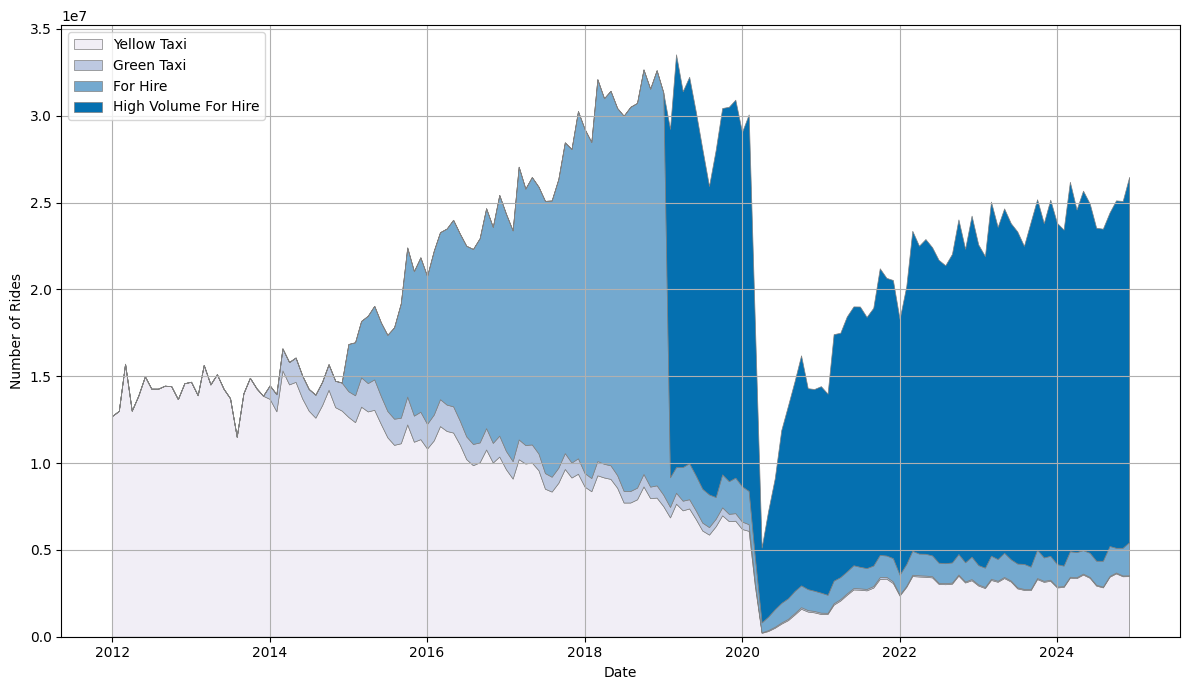

In [6]:
df_yellow["ride_date"] = pd.to_datetime(df_yellow["ride_date"])
df_green["ride_date"] = pd.to_datetime(df_green["ride_date"])
df_for_hire["ride_date"] = pd.to_datetime(df_for_hire["ride_date"])
df_high_volume_for_hire["ride_date"] = pd.to_datetime(
    df_high_volume_for_hire["ride_date"]
)

df_yellow = df_yellow.rename(columns={"rides": "rides_yellow"})
df_green = df_green.rename(columns={"rides": "rides_green"})
df_for_hire = df_for_hire.rename(columns={"rides": "rides_for_hire"})
df_high_volume_for_hire = df_high_volume_for_hire.rename(
    columns={"rides": "rides_high_volume_for_hire"}
)

merged_df = df_yellow.merge(df_green, on="ride_date", how="outer")
merged_df = merged_df.merge(df_for_hire, on="ride_date", how="outer")
merged_df = merged_df.merge(df_high_volume_for_hire, on="ride_date", how="outer")

merged_df = merged_df.fillna(0)

merged_df = merged_df.sort_values("ride_date")

plt.figure(figsize=(12, 7))

plt.stackplot(
    merged_df["ride_date"],  # X-axis: Dates
    merged_df["rides_yellow"],  # Y-axis data for Yellow Taxi
    merged_df["rides_green"],  # Y-axis data for Green Taxi
    merged_df["rides_for_hire"],  # Y-axis data for For Hire
    merged_df["rides_high_volume_for_hire"],  # Y-axis data for High Volume For Hire
    labels=["Yellow Taxi", "Green Taxi", "For Hire", "High Volume For Hire"],
    colors=colors,
    **{"edgecolor": "grey", "linewidth": 0.5}
)  # Labels for the legend

plt.xlabel("Date")
plt.ylabel("Number of Rides")
# plt.title("Daily Taxi and For-Hire Vehicle Rides Over Time")

plt.legend(loc="upper left")

plt.grid(True)
plt.tight_layout()
plt.savefig("data/figures/visualize_fhvhv_total.svg", bbox_inches="tight")
plt.show()

In [7]:
df_yellow = duckdb.sql(yello_taxi_sql("month")).df()
df_green = duckdb.sql(green_taxi_sql("month")).df()
df_for_hire = duckdb.sql(for_hire_sql("month")).df()
df_high_volume_for_hire = duckdb.sql(high_volume_sql("month")).df()


df_yellow["ride_date"] = pd.to_datetime(df_yellow["ride_date"])
df_green["ride_date"] = pd.to_datetime(df_green["ride_date"])
df_for_hire["ride_date"] = pd.to_datetime(df_for_hire["ride_date"])
df_high_volume_for_hire["ride_date"] = pd.to_datetime(
    df_high_volume_for_hire["ride_date"]
)

df_yellow = df_yellow.rename(columns={"rides": "rides_yellow"})
df_green = df_green.rename(columns={"rides": "rides_green"})
df_for_hire = df_for_hire.rename(columns={"rides": "rides_for_hire"})
df_high_volume_for_hire = df_high_volume_for_hire.rename(
    columns={"rides": "rides_high_volume_for_hire"}
)

merged_df = df_yellow.merge(df_green, on="ride_date", how="outer")
merged_df = merged_df.merge(df_for_hire, on="ride_date", how="outer")
merged_df = merged_df.merge(df_high_volume_for_hire, on="ride_date", how="outer")

merged_df = merged_df.fillna(0)

merged_df = merged_df.sort_values("ride_date")

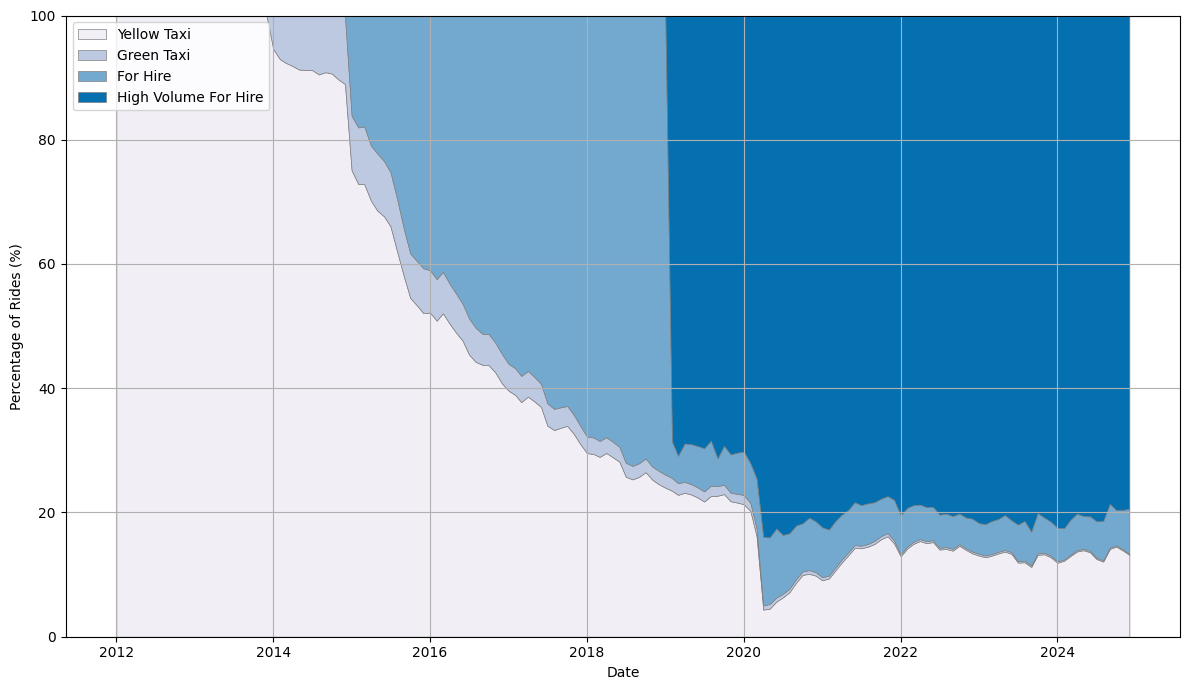

In [8]:
merged_df["total_rides"] = (
    merged_df["rides_yellow"]
    + merged_df["rides_green"]
    + merged_df["rides_for_hire"]
    + merged_df["rides_high_volume_for_hire"]
)


merged_df["percent_yellow"] = (
    merged_df["rides_yellow"] / merged_df["total_rides"].replace(0, 1) * 100
)
merged_df["percent_green"] = (
    merged_df["rides_green"] / merged_df["total_rides"].replace(0, 1) * 100
)
merged_df["percent_for_hire"] = (
    merged_df["rides_for_hire"] / merged_df["total_rides"].replace(0, 1) * 100
)
merged_df["percent_high_volume_for_hire"] = (
    merged_df["rides_high_volume_for_hire"]
    / merged_df["total_rides"].replace(0, 1)
    * 100
)

merged_df = merged_df.fillna(0)


plt.figure(figsize=(12, 7))

plt.stackplot(
    merged_df["ride_date"],
    merged_df["percent_yellow"],
    merged_df["percent_green"],
    merged_df["percent_for_hire"],
    merged_df["percent_high_volume_for_hire"],
    labels=["Yellow Taxi", "Green Taxi", "For Hire", "High Volume For Hire"],
    colors=colors,
    **{"edgecolor": "grey", "linewidth": 0.5}
)

plt.xlabel("Date")
plt.ylabel("Percentage of Rides (%)")
# plt.title("Daily Taxi and For-Hire Vehicle Rides: Market Share Over Time")

plt.ylim(0, 100)
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.savefig("data/figures/visualize_fhvhv_relative.svg", bbox_inches="tight")
plt.show()